# Inverse Problems: Problem Set №1

Group C: Mateusz Brodowicz and Anton Myshak

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import core as cr


from prbsets import deconv1D as conv
from importlib import reload #to reload libs online, like cr = reload(cr)
from matplotlib.image import imread

# Task 1

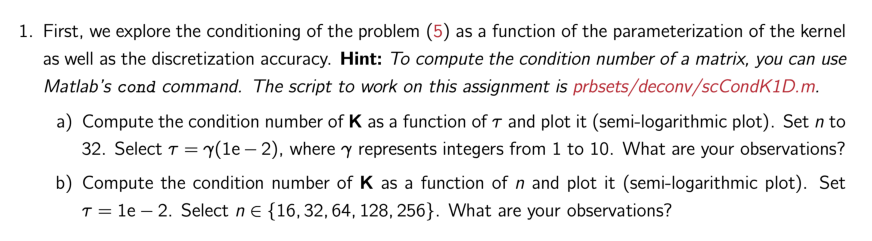

In [2]:
plt.figure(figsize=(11,4))
plt.imshow(imread('./assignment/tasks/ex1.png'))
plt.axis('off');

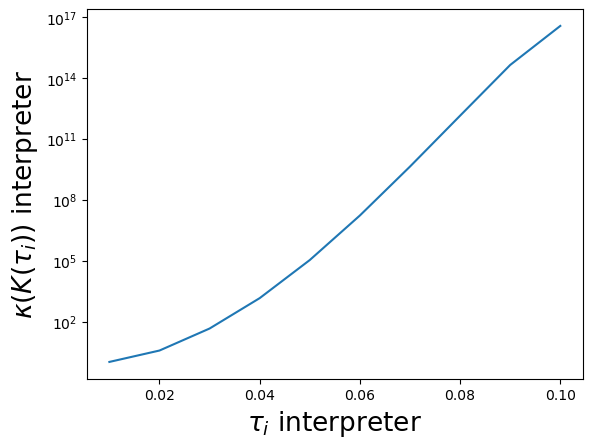

In [3]:
# statement (a)
# first part of the scCondK1D file
reload(conv)
reload(cr)

n = 32 # number of points
tau = np.linspace(0.01, 0.1, 10) # kernel parameterization

# initialize memory
m = len(tau)
kappa = np.zeros((m,1))

# compute condition number estimate as a function of sigma
for i in range(m):
    K = conv.getKernel1D( n, tau[i] )
    kappa[i] = np.linalg.cond(K) # ADD YOUR CODE HERE

# visualize computed condition numbers
plt.figure()
plt.plot(tau, kappa)
plt.yscale('log')
plt.xlabel(r'$\tau_i$ interpreter', size=19)
plt.ylabel(r'$\kappa(K(\tau_i))$ interpreter', size=19);

We can notice exponential growth in the begginning, then the growth becomes linear, but after $\tau=0.09$ the line starts to concave down.

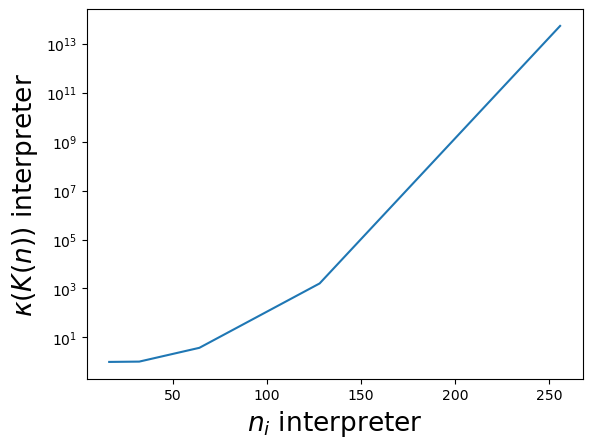

In [4]:
# statement (b)
# second part of the scCondK1D file
reload(conv)
reload(cr)

tau = 0.01 # standard deviation
n = [16, 32, 64, 128, 256] # number of grid points

# initialize memory
m = len(n);
kappa = np.zeros((m,1));

# compute condition number estimate as a function of sigma
for i in range(m):
    K = conv.getKernel1D(n[i], tau)
    kappa[i] = np.linalg.cond(K) # ADD YOUR CODE HERE

# visualize computed condition numbers
plt.figure()
plt.plot(n, kappa)
plt.yscale('log')
plt.xlabel(r'$n_i$ interpreter', size=19)
plt.ylabel(r'$\kappa(K(n))$ interpreter', size=19);

We can notice exponential growth.

# Task 2(a)

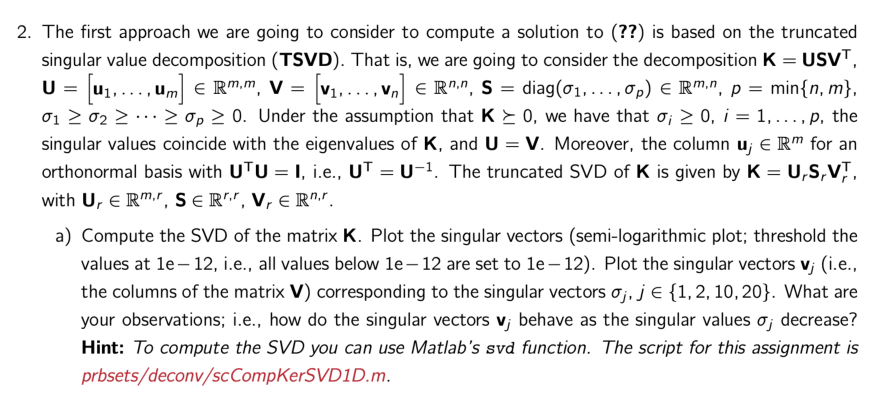

In [5]:
plt.figure(figsize=(15,5))
plt.imshow(imread('./assignment/tasks/ex2a.png'))
plt.axis('off');

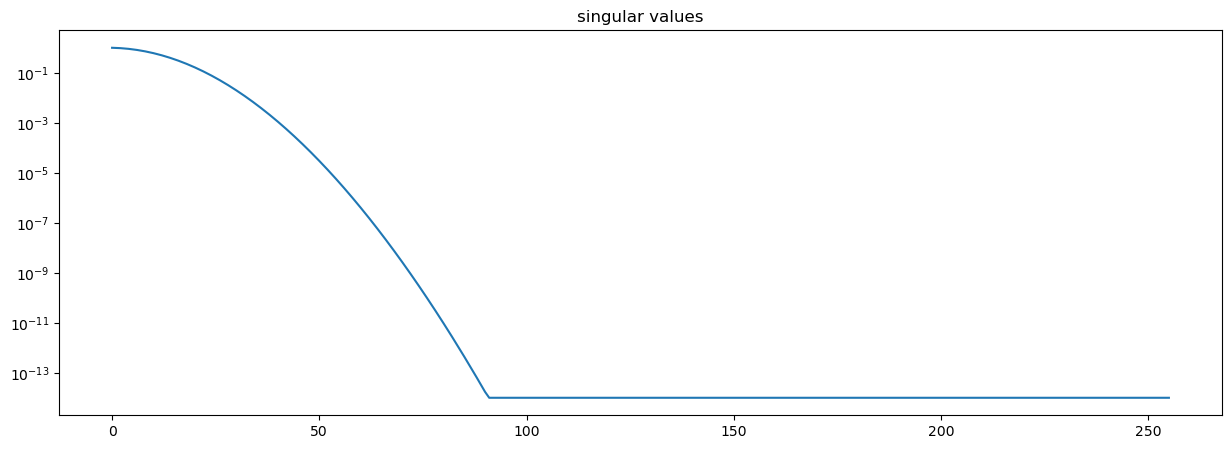

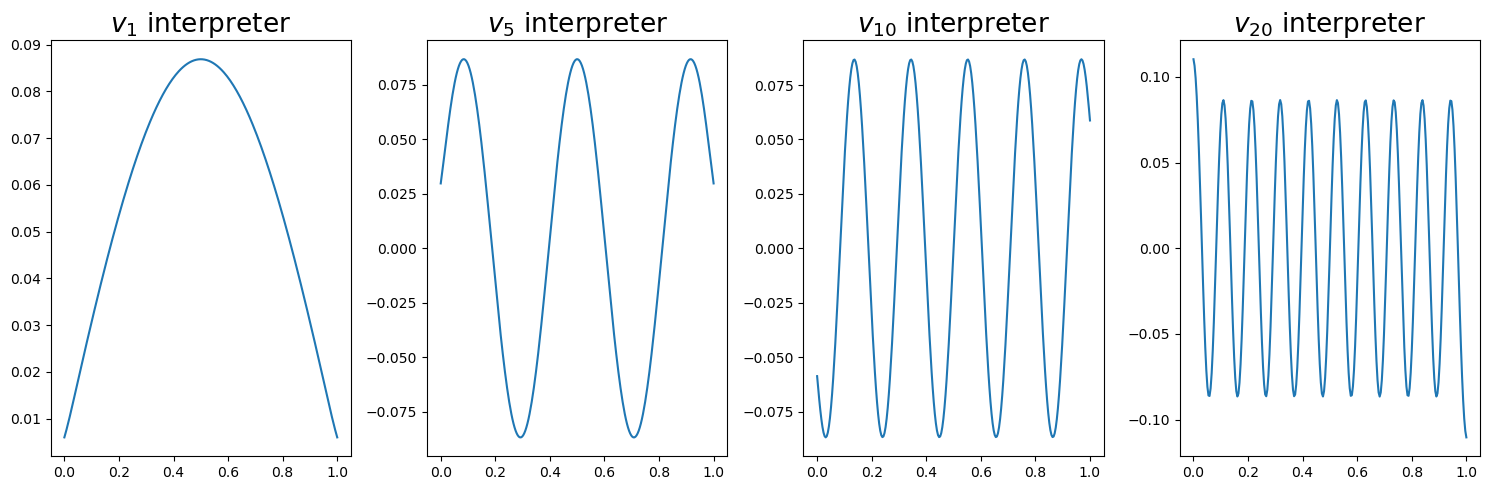

In [6]:
reload(conv)
reload(cr)
conv.scCompKerSVD1D()

# Task 2(b)

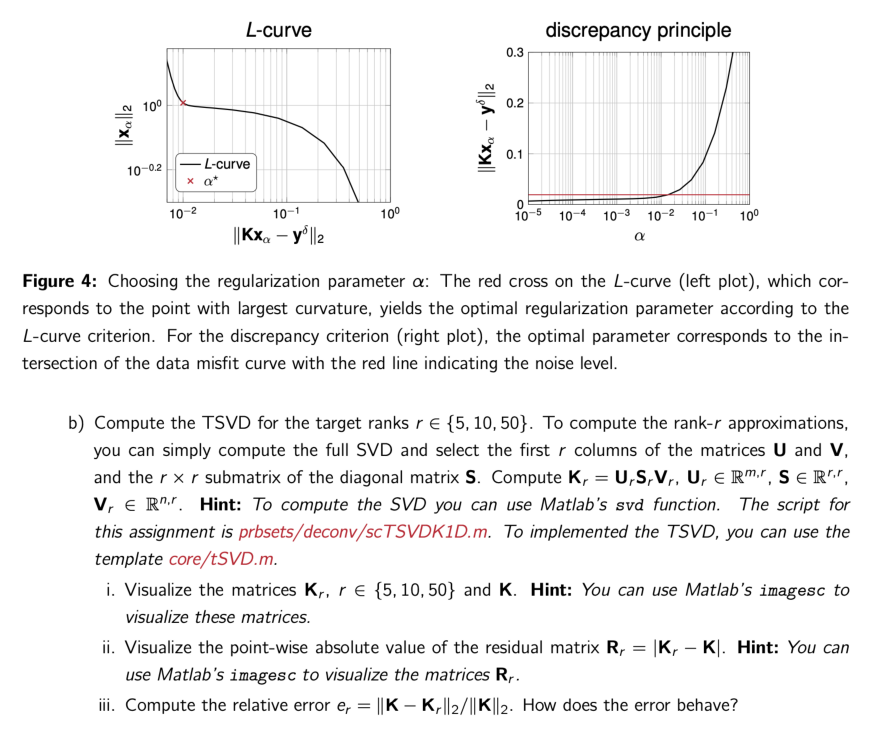

In [7]:
plt.figure(figsize=(11,10))
plt.imshow(imread('./assignment/tasks/ex2b.png'))
plt.axis('off');

 error (rank  5) =  0.710644965833118
 error (rank 10) =  0.4317976477170728
 error (rank 50) =  1.3115839359184295e-05


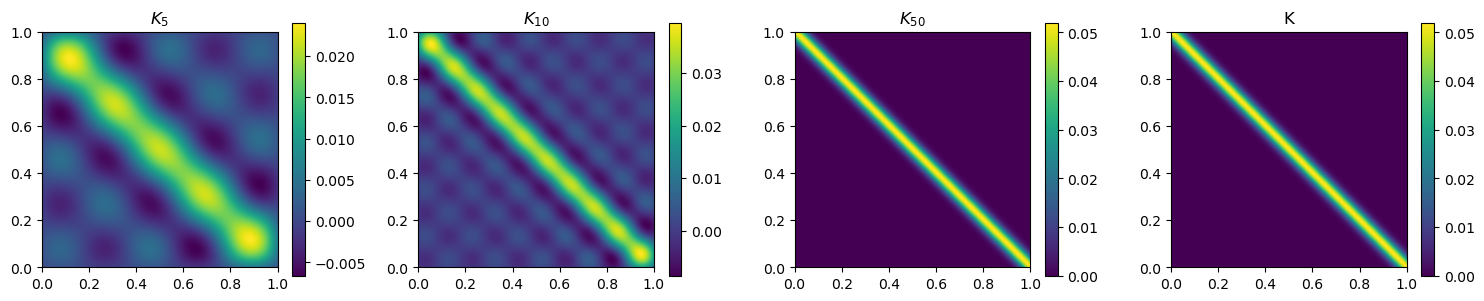

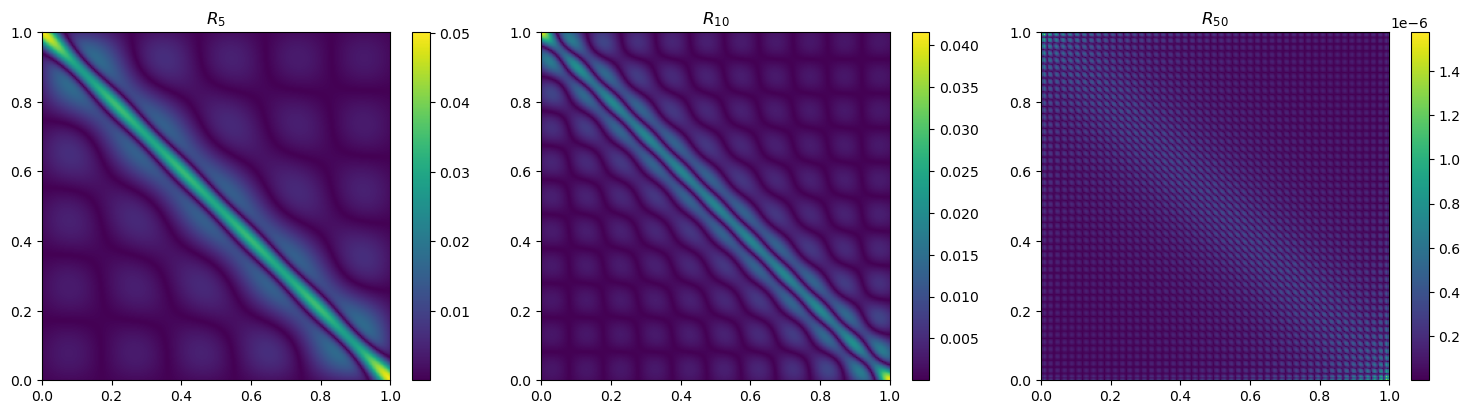

In [8]:
reload(conv)
reload(cr)
conv.scTSVDK1D()

How does the error behave?

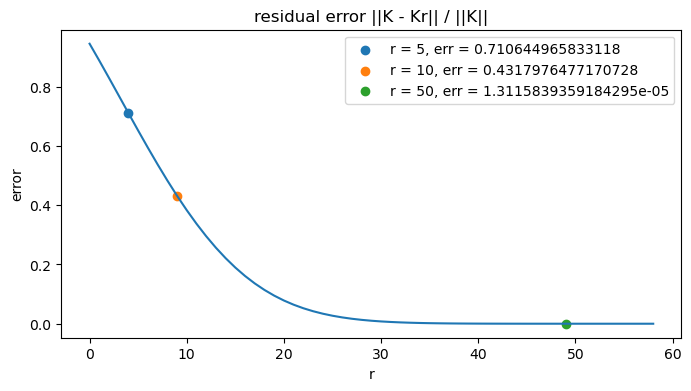

In [9]:
reload(conv)
reload(cr)
conv.PlotResErr()

# Task 2(c)

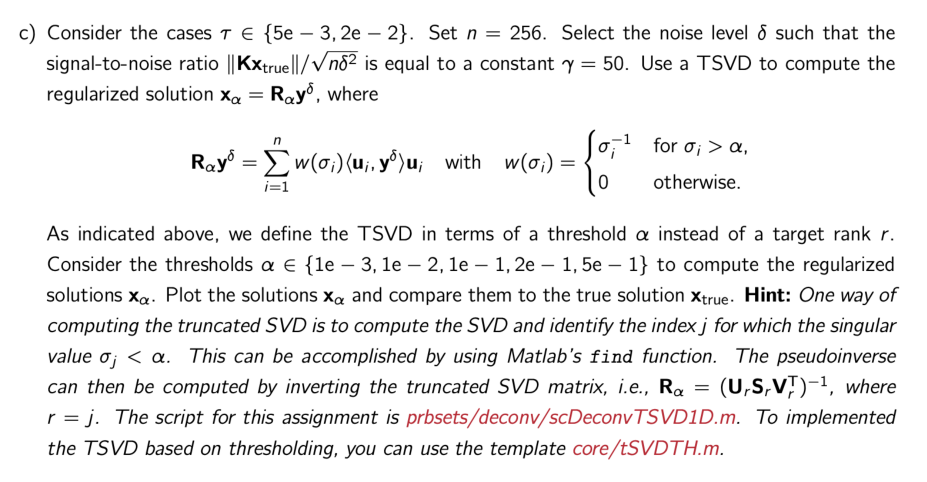

In [10]:
plt.figure(figsize=(15,6))
plt.imshow(imread('./assignment/tasks/ex2c.png'))
plt.axis('off');

condition number of K: 1619.741154844817


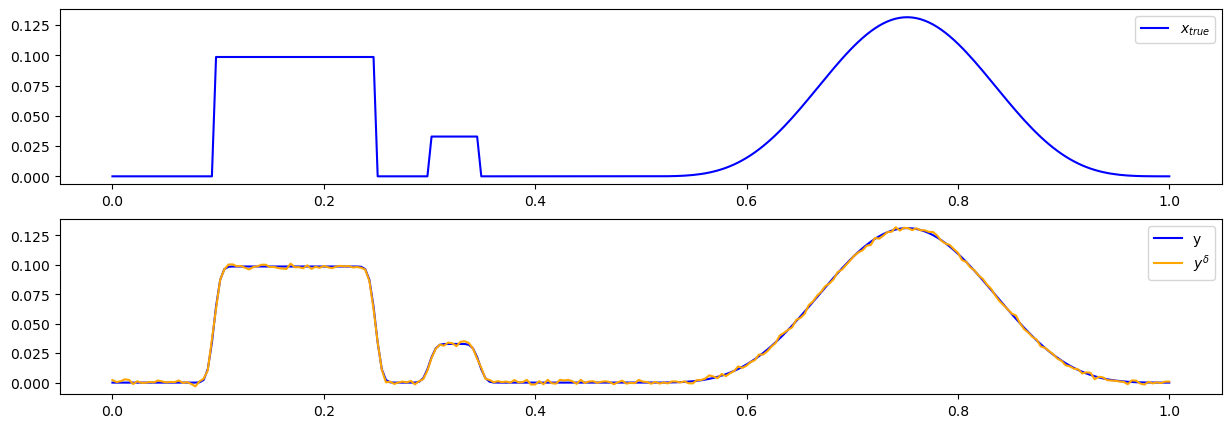

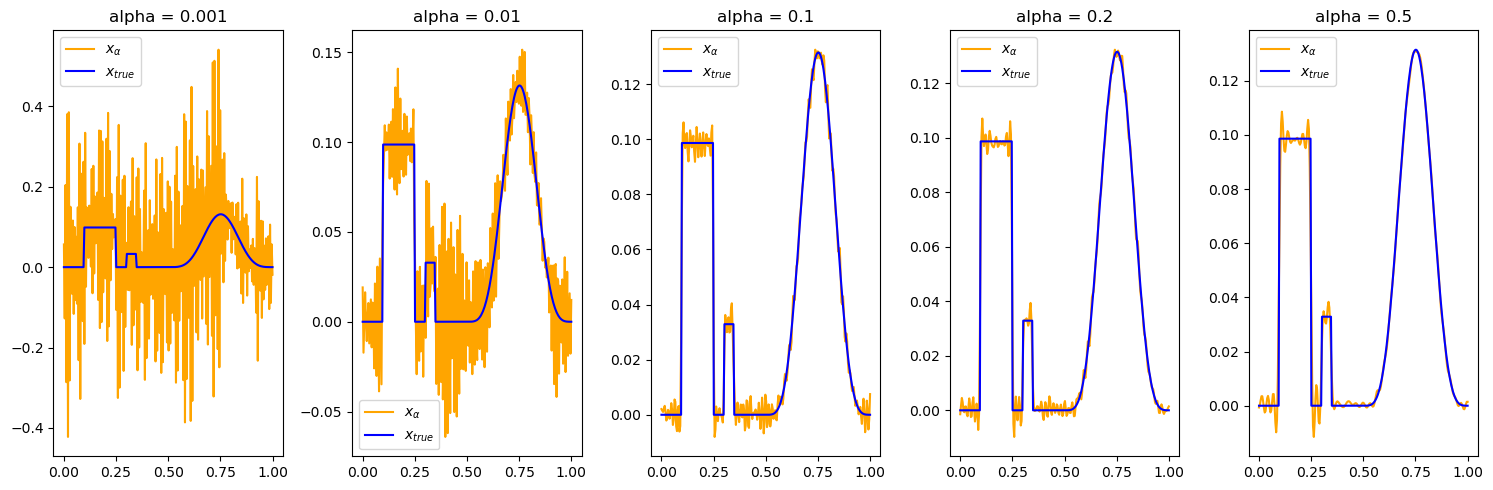

In [11]:
reload(conv)
reload(cr)
conv.scDeconvTSVD1D()

# Task 3(a)

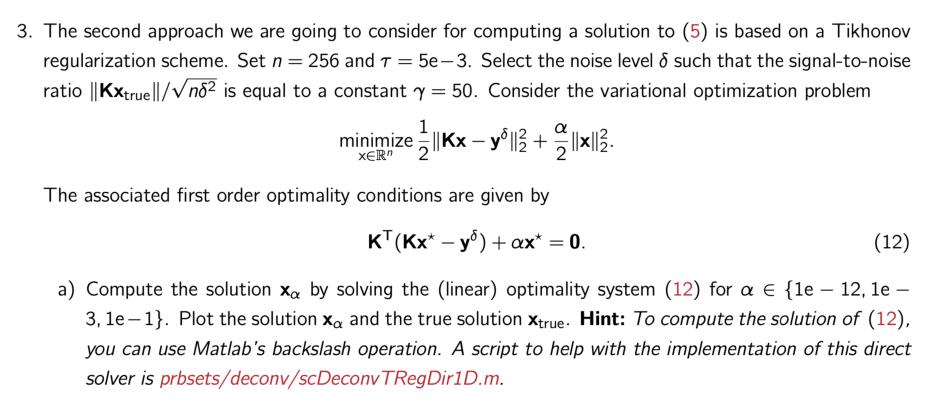

In [12]:
plt.figure(figsize=(15,5))
plt.imshow(imread('./assignment/tasks/ex3a.png'))
plt.axis('off');

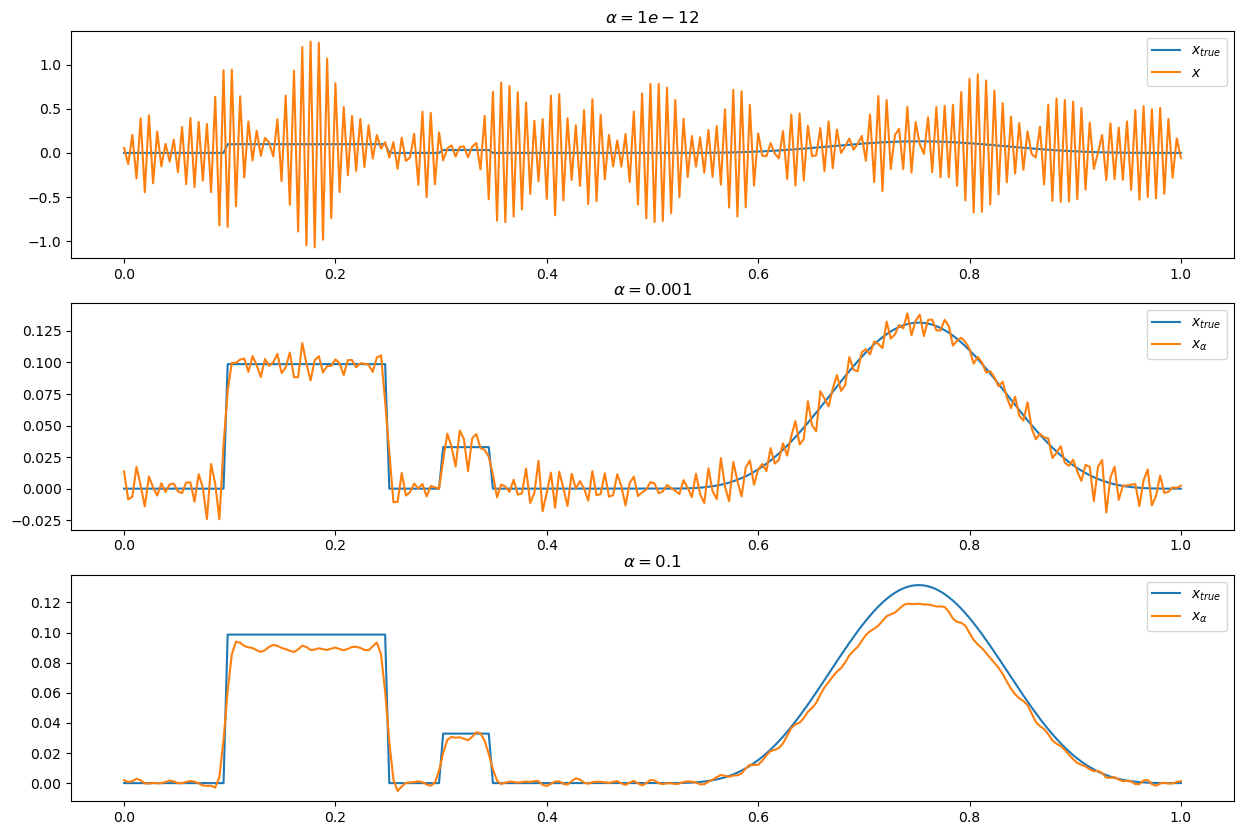

In [13]:
reload(conv)
reload(cr)
conv.scDeconvTRegDir1D()

# Task 3(b)

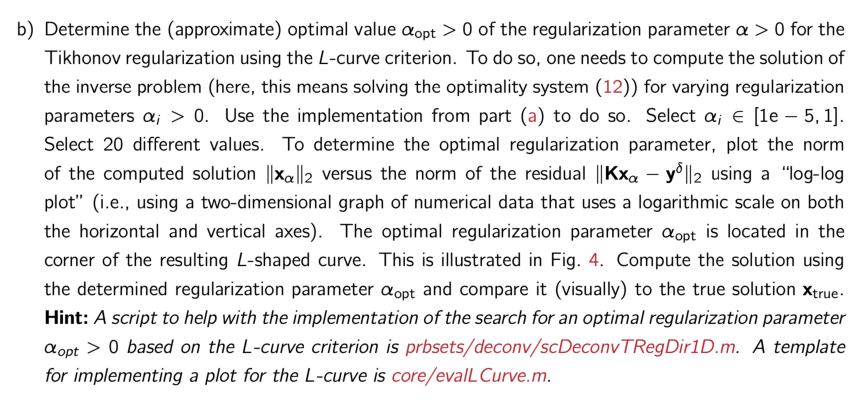

In [14]:
plt.figure(figsize=(15,5))
plt.imshow(imread('./assignment/tasks/ex3b.png'))
plt.axis('off');

alpha=1e-05:  ||r|| = 0.0061410454084789064  ||x|| = 1.6377429071357048
alpha=0.05264105263157895:  ||r|| = 0.05228479616933959  ||x|| = 0.9454167076159778
alpha=0.10527210526315789:  ||r|| = 0.09671748777582695  ||x|| = 0.8995720063147691
alpha=0.15790315789473686:  ||r|| = 0.1374559820369508  ||x|| = 0.8581272767455912
alpha=0.2105342105263158:  ||r|| = 0.17471133263170818  ||x|| = 0.8203939587037419
alpha=0.26316526315789474:  ||r|| = 0.20886961775845891  ||x|| = 0.7858710477554313
alpha=0.3157963157894737:  ||r|| = 0.24028939245610711  ||x|| = 0.7541554804593473
alpha=0.3684273684210526:  ||r|| = 0.26928290520886183  ||x|| = 0.724913058801355
alpha=0.4210584210526316:  ||r|| = 0.29611897496925293  ||x|| = 0.69786241050859
alpha=0.47368947368421055:  ||r|| = 0.3210290091814626  ||x|| = 0.6727641974101884
alpha=0.5263205263157894:  ||r|| = 0.3442128400600809  ||x|| = 0.6494132099910184
alpha=0.5789515789473684:  ||r|| = 0.36584375083505305  ||x|| = 0.6276323235415094
alpha=0.63158263

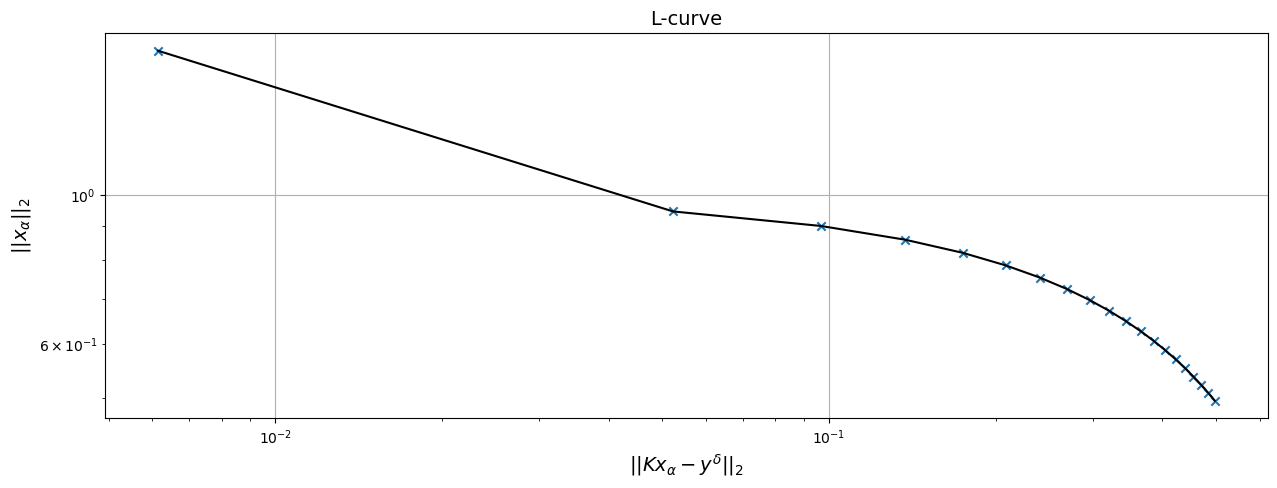

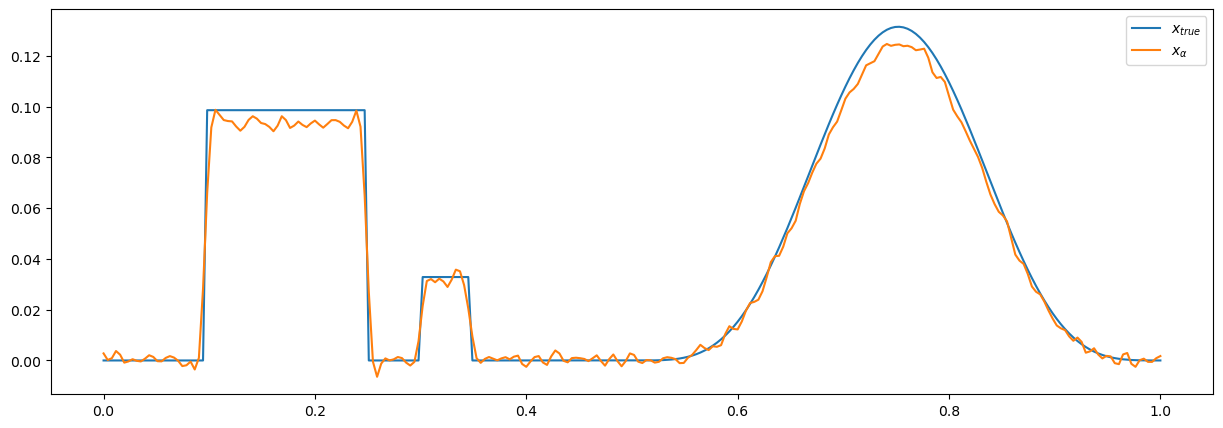

In [15]:
reload(conv)
reload(cr)

alphalist = np.linspace(1e-5, 1, 20)
K, y_delta = conv.scDeconvTRegDir1D(alphalist, plot=False)

cr.evalLCurve(K, y_delta, lambda alpha: np.linalg.lstsq(K.T@K + alpha*np.eye(256), K.T@y_delta, rcond=None)[0], alphalist)

#the best alpha should be?
best_alpha = alphalist[1]
print('\nbest alpha =', best_alpha)
x_true = conv.getDeconvSource1D(256)

plt.figure(figsize=(15, 5))
plt.plot(np.linspace(0, 1, 256), x_true, label=r'$x_{true}$')
plt.plot(np.linspace(0, 1, 256), np.linalg.lstsq(K.T@K + best_alpha*np.eye(256), K.T@y_delta, rcond=None)[0], label=r'$x_\alpha$')
plt.legend();

# Task 3(c)

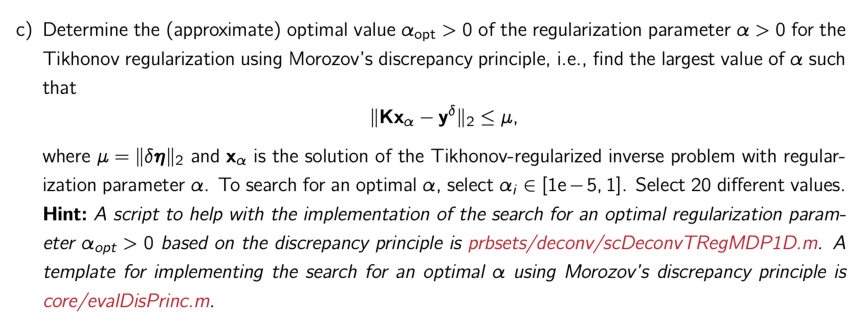

In [16]:
plt.figure(figsize=(15,4))
plt.imshow(imread('./assignment/tasks/ex3c.png'))
plt.axis('off');

err = 0.01934526083266685 <= 0.01959958144993963 = delta
optimal regularization parameter: 0.01438449888287663


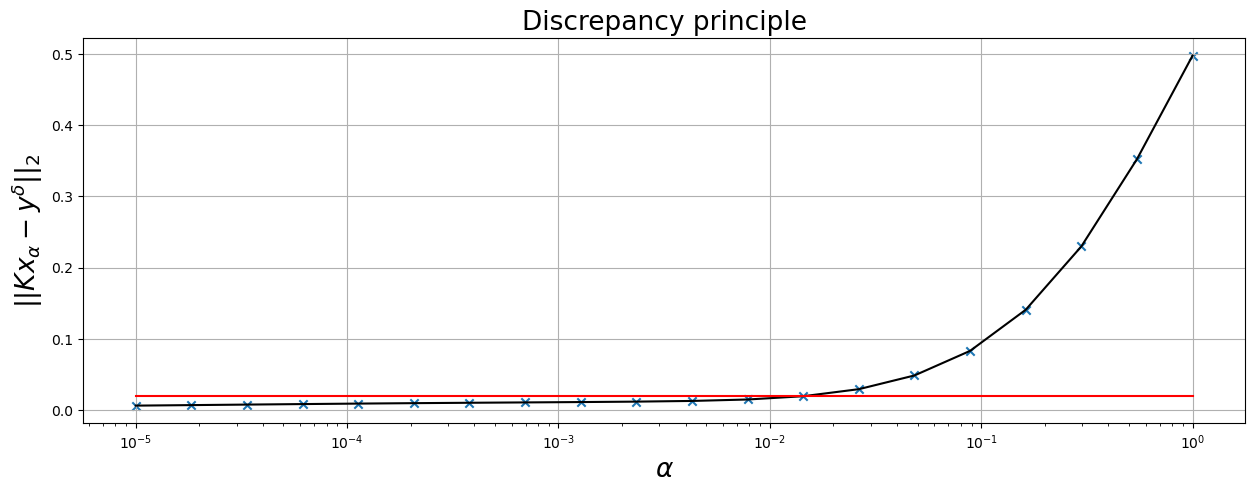

In [17]:
reload(conv)
reload(cr)
conv.scDeconvTRegMDP1P()

# Task 3(d)

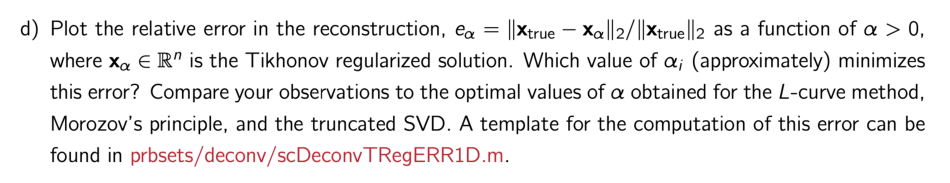

In [18]:
plt.figure(figsize=(12,4))
plt.imshow(imread('./assignment/tasks/ex3d.png'))
plt.axis('off');

run 0: error for alpha=1e-05: [1.31144075]
run 1: error for alpha=1.8329807108324375e-05: [1.00678683]
run 2: error for alpha=3.359818286283781e-05: [0.75823897]
run 3: error for alpha=6.158482110660267e-05: [0.56153885]
run 4: error for alpha=0.00011288378916846884: [0.41138298]
run 5: error for alpha=0.00020691380811147902: [0.30131475]
run 6: error for alpha=0.000379269019073225: [0.22335336]
run 7: error for alpha=0.0006951927961775605: [0.16906079]
run 8: error for alpha=0.0012742749857031334: [0.1313707]
run 9: error for alpha=0.002335721469090121: [0.10530221]
run 10: error for alpha=0.004281332398719391: [0.08762199]
run 11: error for alpha=0.007847599703514606: [0.07650128]
run 12: error for alpha=0.01438449888287663: [0.07128551]
run 13: error for alpha=0.026366508987303583: [0.07246206]
run 14: error for alpha=0.04832930238571752: [0.08279503]
run 15: error for alpha=0.08858667904100823: [0.10880149]
run 16: error for alpha=0.1623776739188721: [0.15983178]
run 17: error for 

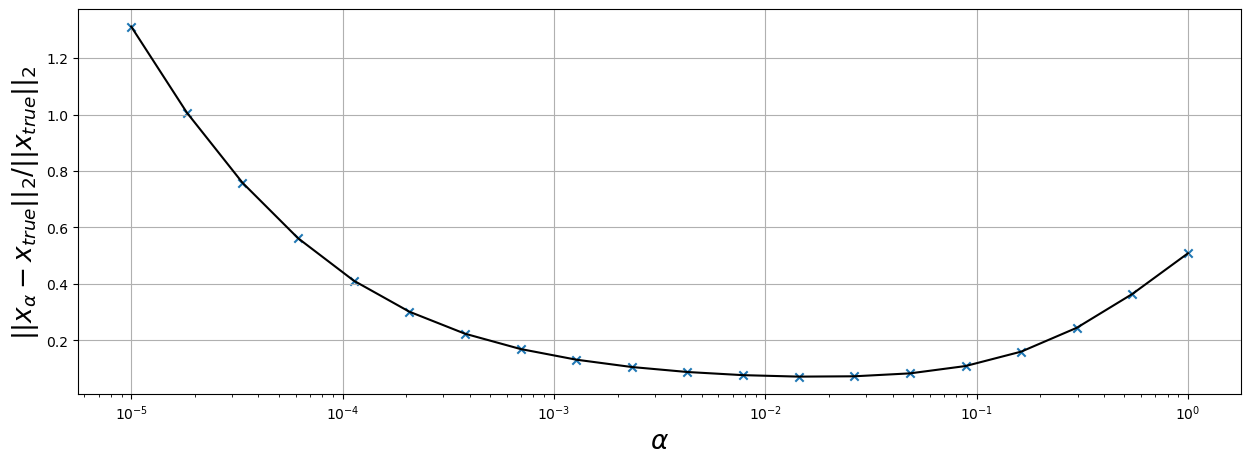

In [19]:
reload(conv)
reload(cr)
conv.scDeconvTRegERR1D()

L-curve method (3b) gives us best $\alpha = 0.05264$, while Morozov's discrepancy principle (3c) and minimization of the relative error in the reconstruction (3d) provide us a different best $\alpha = 0.01438$.

# Task 4

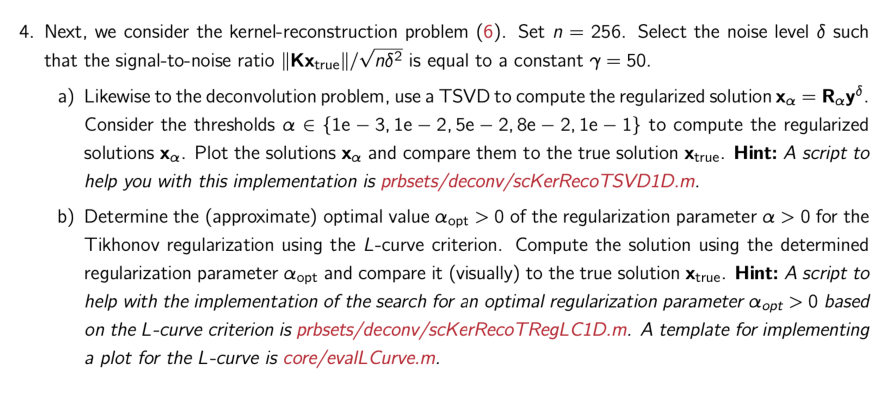

In [20]:
plt.figure(figsize=(15,5))
plt.imshow(imread('./assignment/tasks/ex4.png'))
plt.axis('off');

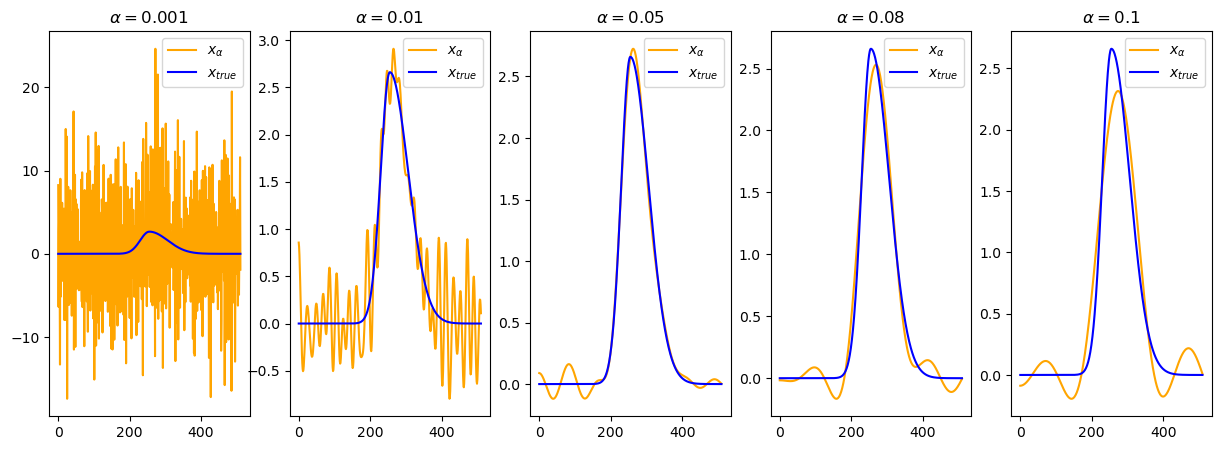

In [21]:
# statement (a)
reload(conv)
reload(cr)
conv.scKerRecoTSVD1D()

alpha=1e-05:  ||r|| = 0.2189719660397398  ||x|| = 60.40405041797399
alpha=1.8329807108324375e-05:  ||r|| = 0.2632715091390495  ||x|| = 45.26479268222662
alpha=3.359818286283781e-05:  ||r|| = 0.29993368674657295  ||x|| = 34.644858408124136
alpha=6.158482110660267e-05:  ||r|| = 0.32872972099976555  ||x|| = 28.155735910243706
alpha=0.00011288378916846884:  ||r|| = 0.35061946392800336  ||x|| = 24.690908765273573
alpha=0.00020691380811147902:  ||r|| = 0.36707229858656426  ||x|| = 23.027696816890053
alpha=0.000379269019073225:  ||r|| = 0.38007850361406875  ||x|| = 22.24442833608155
alpha=0.0006951927961775605:  ||r|| = 0.3928934387068959  ||x|| = 21.804249336626963
alpha=0.0012742749857031334:  ||r|| = 0.4122665881354553  ||x|| = 21.427823897225466
alpha=0.002335721469090121:  ||r|| = 0.45291506917793545  ||x|| = 20.96108936303843
alpha=0.004281332398719391:  ||r|| = 0.5416662793328133  ||x|| = 20.3052772983905
alpha=0.007847599703514606:  ||r|| = 0.7126965146291593  ||x|| = 19.3986026223650

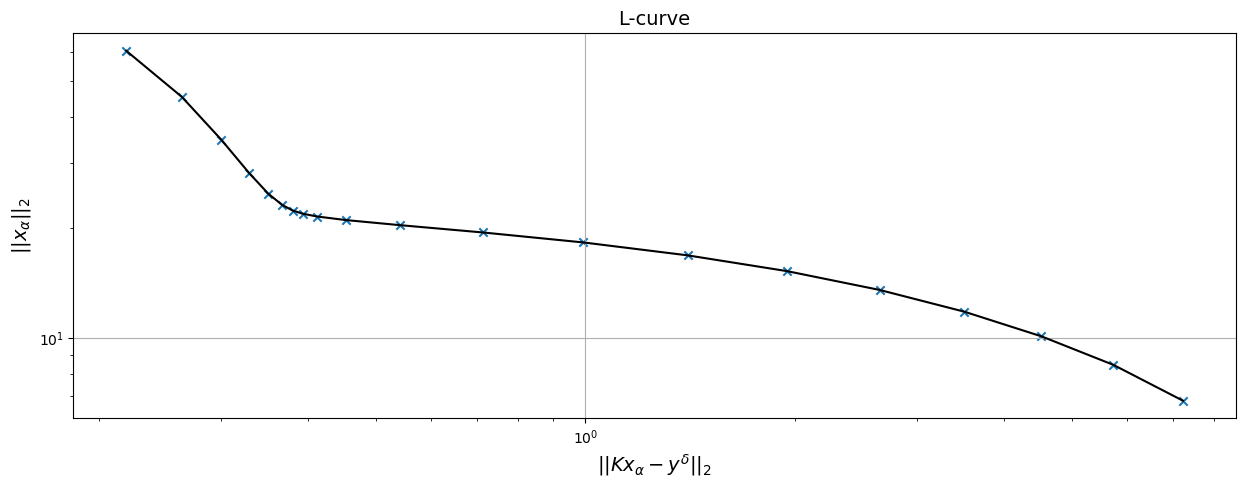

In [22]:
# statement (b)
reload(conv)
reload(cr)
conv.scKerRecoTRegLC1D()


best alpha = 0.0006951927961775605


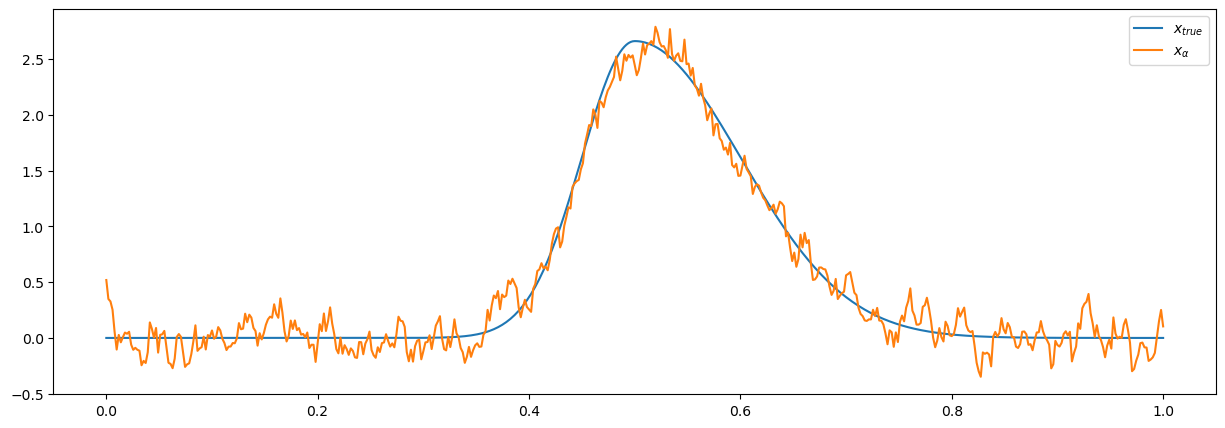

In [23]:
#the best alpha should be?
alphalist = np.logspace(-5, 0, 20)
best_alpha = alphalist[7] # or 6 or 8
print('\nbest alpha =', best_alpha)

K = conv.getRecoMat1D(256)
x_true, s = conv.getRecoKernel1D(256)
y = K @ x_true
delta = np.linalg.norm(y) / (np.sqrt(256) * 50)
y_delta, noise = cr.addNoise(y, delta, return_noise=True)

plt.figure(figsize=(15, 5))
plt.plot(np.linspace(0, 1, 511), x_true, label=r'$x_{true}$')
plt.plot(np.linspace(0, 1, 511), np.linalg.lstsq(K.T@K + best_alpha*np.eye(511), K.T@y_delta, rcond=None)[0], label=r'$x_\alpha$')
plt.legend();